In [1]:
# Imports
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2016-07-12", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-12", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["DIS"]

# Get 5 year's worth of historical price data for Disney
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

DIS                                 
                             open    high     low   close   volume
time                                                              
2017-07-21 00:00:00-04:00  107.10  107.33  106.14  106.24  3206853
2017-07-24 00:00:00-04:00  106.41  107.27  106.11  107.04  3336595
2017-07-25 00:00:00-04:00  107.60  107.74  105.36  105.57  4057514
2017-07-26 00:00:00-04:00  105.72  107.03  105.48  106.92  3024351
2017-07-27 00:00:00-04:00  107.69  110.00  107.44  109.99  7962406

In [5]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [15]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5)

In [16]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

DIS                                   \
                             open    high     low   close   volume   
time                                                                 
2017-07-21 00:00:00-04:00  107.10  107.33  106.14  106.24  3206853   
2017-07-24 00:00:00-04:00  106.41  107.27  106.11  107.04  3336595   
2017-07-25 00:00:00-04:00  107.60  107.74  105.36  105.57  4057514   
2017-07-26 00:00:00-04:00  105.72  107.03  105.48  106.92  3024351   
2017-07-27 00:00:00-04:00  107.69  110.00  107.44  109.99  7962406   

                                        
                          daily_return  
time                                    
2017-07-21 00:00:00-04:00          NaN  
2017-07-24 00:00:00-04:00     0.007530  
2017-07-25 00:00:00-04:00    -0.013733  
2017-07-26 00:00:00-04:00     0.012788  
2017-07-27 00:00:00-04:00     0.028713

In [18]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986464,1.008977,0.992680,1.000039,0.985412,1.006185,0.972266,0.969114,1.009342,1.012164,...,0.988762,0.979761,0.991779,0.993132,0.979716,0.958398,0.990562,0.987601,0.978141,0.994449
2,0.985071,1.024159,0.995092,1.007300,0.980609,1.004939,0.961984,0.970414,1.000007,1.001873,...,0.991663,0.973543,0.979448,1.009096,0.966011,0.965269,1.003411,1.020170,1.003568,0.993766
3,0.977030,1.015204,1.020925,0.990876,1.008529,0.996343,0.966175,0.999917,0.980296,0.978405,...,1.005884,0.945632,0.932306,0.988275,0.971502,0.964301,1.001930,1.058960,0.998730,0.966922
4,1.001584,1.038555,1.035443,0.970674,1.013928,0.961602,0.964920,0.996828,0.990264,0.952267,...,1.014607,0.914439,0.908735,1.008078,0.978840,0.982382,1.027476,1.038189,0.983345,0.963537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.255031,0.816840,2.819973,1.902446,3.754331,1.298022,2.900432,2.624164,0.932131,2.039145,...,3.439568,1.246906,4.177626,5.307377,1.706139,0.609284,2.225039,3.188038,1.792118,0.705993
1257,2.272241,0.818798,2.819925,1.926098,3.787268,1.287288,2.893950,2.613638,0.961839,2.001759,...,3.382354,1.204586,4.138196,5.666118,1.740134,0.602178,2.166236,3.207688,1.844899,0.709518
1258,2.308048,0.826808,2.821421,1.914447,3.723711,1.302488,2.899272,2.653129,0.992307,2.010409,...,3.383115,1.199632,4.153459,5.700753,1.730302,0.601612,2.164305,3.242385,1.884085,0.705479
1259,2.350678,0.861711,2.769986,1.957687,3.692568,1.345255,2.898621,2.639148,0.971348,2.036155,...,3.410668,1.169581,4.181852,5.655710,1.700617,0.618002,2.202867,3.140278,1.833057,0.715147


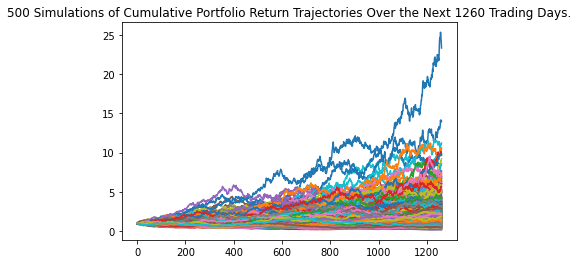

In [19]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

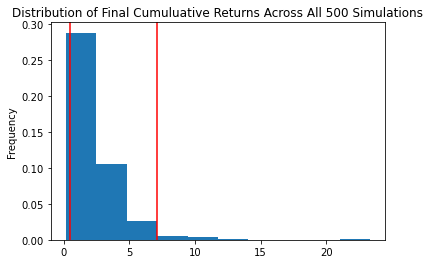

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.370782
std               2.000518
min               0.174181
25%               1.148791
50%               1.836237
75%               2.936075
max              23.326447
95% CI Lower      0.462685
95% CI Upper      7.133380
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $4626.85 and $71333.8
